In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
import scipy.spatial as spa
import cvxopt as cvx
import pandas as pd
import scipy.spatial.distance as dt

## Part 2

In [2]:
# read data into memory
images_data = np.genfromtxt("hw06_images.csv", delimiter = ",")
labels_data = np.genfromtxt("hw06_labels.csv", delimiter = ",")

## Part 3

In [3]:
train_images = images_data[:1000,:]
test_images = images_data[1000:,:]
train_label = labels_data[:1000]
test_label = labels_data[1000:]

# get X and y values
X_train = train_images
y_train = train_label.astype(int)
X_test = test_images
y_test = test_label.astype(int)

# get number of samples and number of features
N_train = X_train.shape[0]
D_train = X_train.shape[1]
N_test = X_test.shape[0]
K = int(np.max(train_label)) # classes 

In [4]:
# define Gaussian kernel function
def gaussian_kernel(X1, X2, s):
    D = dt.cdist(X1, X2)
    K = np.exp(-D**2 / (2 * s**2))
    return(K)

In [5]:
# calculate Gaussian kernel
s = 10
K_train = gaussian_kernel(X_train, X_train, s)
K_test = gaussian_kernel(X_test,X_train , s)
# set learning parameters
epsilon = 1e-3

In [6]:
def OVA(C,s=10):
    f_predicteds=[]
    f_predictedsTest=[]
    for i in range(1,K+1):
        y_trainNew=np.copy(y_train)
        y_trainNew[y_trainNew != i]=-1.0
        y_trainNew[y_trainNew == i]=1.0
        
        yyK = np.matmul(y_trainNew[:,None], y_trainNew[None,:]) * K_train
    
        P = cvx.matrix(yyK)
        q = cvx.matrix(-np.ones((N_train, 1)))
        G = cvx.matrix(np.vstack((-np.eye(N_train), np.eye(N_train))))
        h = cvx.matrix(np.vstack((np.zeros((N_train, 1)), C * np.ones((N_train, 1)))))
        A = cvx.matrix(1.0 * y_trainNew[None,:])
        b = cvx.matrix(0.0)

        # use cvxopt library to solve QP problems
        result = cvx.solvers.qp(P, q, G, h, A, b)
        alpha = np.reshape(result["x"], N_train)
        alpha[alpha < C * epsilon] = 0
        alpha[alpha > C * (1 - epsilon)] = C

        # find bias parameter
        support_indices, = np.where(alpha != 0)
        active_indices, = np.where(np.logical_and(alpha != 0, alpha < C))
        w0 = np.mean(y_trainNew[active_indices] * (1 - np.matmul(yyK[np.ix_(active_indices, support_indices)], alpha[support_indices])))
        
        # calculate predictions on training samples
        f_predicted = np.matmul(K_train, y_trainNew[:,None] * alpha[:,None]) + w0
        f_predicteds.append(f_predicted)

        # calculate predictions on training samples
        f_predictedTest = np.matmul(K_test , y_trainNew[:,None]* alpha[:,None]) + w0 
        f_predictedsTest.append(f_predictedTest)

    return f_predicteds,f_predictedsTest
    

In [7]:
C=10
f_predicteds,f_predictedsTest=OVA(C)


     pcost       dcost       gap    pres   dres
 0:  2.9600e+01 -4.2260e+04  8e+04  4e-01  3e-14
 1:  1.2992e+01 -7.4611e+03  8e+03  2e-02  4e-14
 2: -6.2643e+02 -2.9089e+03  2e+03  4e-03  3e-14
 3: -8.9105e+02 -1.7204e+03  8e+02  1e-03  4e-14
 4: -1.0255e+03 -1.3482e+03  3e+02  2e-04  4e-14
 5: -1.0893e+03 -1.1778e+03  9e+01  2e-05  5e-14
 6: -1.1096e+03 -1.1353e+03  3e+01  3e-07  5e-14
 7: -1.1169e+03 -1.1209e+03  4e+00  7e-14  5e-14
 8: -1.1184e+03 -1.1185e+03  1e-01  9e-14  5e-14
 9: -1.1185e+03 -1.1185e+03  4e-03  1e-13  5e-14
10: -1.1185e+03 -1.1185e+03  7e-05  1e-13  5e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.9161e+02 -4.0951e+04  8e+04  4e-01  2e-14
 1:  1.7375e+02 -7.6611e+03  9e+03  2e-02  3e-14
 2: -4.0615e+02 -2.9616e+03  3e+03  6e-03  3e-14
 3: -6.2557e+02 -1.7531e+03  1e+03  2e-03  3e-14
 4: -7.5417e+02 -1.1618e+03  4e+02  4e-04  3e-14
 5: -8.2696e+02 -9.7495e+02  1e+02  6e-14  3e-14
 6: -8.5262e+02 -8.9665e+02  4e+01  2e-16  3e-1

In [12]:
f_predicteds

[array([[-2.44045746],
        [ 0.41407561],
        [-3.9354969 ],
        [-1.01146891],
        [-2.40857621],
        [-2.02149286],
        [-0.91624525],
        [ 1.02481887],
        [-0.40461093],
        [ 0.79713695],
        [-4.41909407],
        [-1.03015858],
        [-1.63641383],
        [-1.01591535],
        [-1.88225471],
        [-1.99775655],
        [ 1.45187899],
        [-0.99962451],
        [-1.38467998],
        [-2.82837669],
        [ 0.39273374],
        [-0.94060834],
        [-0.31986944],
        [-2.8160309 ],
        [-1.67654933],
        [ 1.41586974],
        [-0.8315145 ],
        [ 1.35593941],
        [-2.0266264 ],
        [-1.76079942],
        [-1.72217869],
        [-0.1712829 ],
        [-0.69279148],
        [-1.52287305],
        [-1.37871783],
        [-1.6361784 ],
        [-1.1660328 ],
        [-0.24231318],
        [ 0.34399145],
        [-1.69506727],
        [-0.88807467],
        [-0.83542174],
        [-2.46173553],
        [-0

In [8]:
Y_predicted=(np.reshape(np.stack(np.transpose(f_predicteds), axis=-1), (1000, 5)))
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(np.reshape(y_predicted, N_train), y_train, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train        1    2    3    4    5
y_predicted                         
1            207    1    0    9    0
2              2  199    1    1    0
3              0    1  204    6    0
4              0    1    4  185    1
5              0    0    0    0  178


In [9]:
Y_predictedTest=(np.reshape(np.stack(np.transpose(f_predictedsTest), axis=-1), (4000, 5)))
y_predictedTest = np.argmax(Y_predictedTest, axis = 1) + 1
confusion_matrix2 = pd.crosstab(np.reshape(y_predictedTest, N_test), y_test, rownames = ['y_predicted'], colnames = ['y_test'])
print(confusion_matrix2)

y_test         1    2    3    4    5
y_predicted                         
1            641   23    3  137    9
2             43  714   27   40    4
3              4   39  666   90   10
4            100   32   69  541   16
5             12    2    6   15  757


In [10]:
Cs=[10**(-1), 10**(0), 10**(1), 10**(2), 10**(3)]
accuracyTrains=[]
accuracyTests=[]
for C in Cs:
    f_predicteds,f_predictedsTest=OVA(C)
    Y_predicted=(np.reshape(np.stack(np.transpose(f_predicteds), axis=-1), (1000, 5)))
    y_predicted = np.argmax(Y_predicted, axis = 1) + 1
    Y_predictedTest=(np.reshape(np.stack(np.transpose(f_predictedsTest), axis=-1), (4000, 5)))
    y_predictedTest = np.argmax(Y_predictedTest, axis = 1) + 1
    
    accuracyTrain=0
    for i in range(len(y_predicted)):
        if y_predicted[i]==y_train[i]:
            accuracyTrain=accuracyTrain+1
    accuracyTrain = accuracyTrain/N_train
    accuracyTrains.append(accuracyTrain)
    
    accuracyTest=0
    for i in range(len(y_predictedTest)):
        if y_predictedTest[i]==y_test[i]:
            accuracyTest=accuracyTest+1 
    accuracyTest = accuracyTest/N_test
    accuracyTests.append(accuracyTest)


     pcost       dcost       gap    pres   dres
 0: -1.3936e+02 -2.2047e+02  7e+03  3e+01  3e-15
 1: -3.4801e+01 -2.0264e+02  4e+02  9e-01  3e-15
 2: -2.8151e+01 -7.9601e+01  5e+01  1e-15  1e-15
 3: -3.1266e+01 -4.3423e+01  1e+01  2e-16  1e-15
 4: -3.2572e+01 -3.9120e+01  7e+00  4e-16  1e-15
 5: -3.3423e+01 -3.6637e+01  3e+00  1e-15  1e-15
 6: -3.3666e+01 -3.6029e+01  2e+00  7e-16  1e-15
 7: -3.4121e+01 -3.4971e+01  9e-01  2e-15  1e-15
 8: -3.4319e+01 -3.4585e+01  3e-01  2e-16  1e-15
 9: -3.4415e+01 -3.4445e+01  3e-02  2e-16  1e-15
10: -3.4429e+01 -3.4430e+01  1e-03  2e-15  1e-15
11: -3.4429e+01 -3.4429e+01  5e-05  7e-16  1e-15
12: -3.4429e+01 -3.4429e+01  1e-06  2e-15  1e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.1812e+02 -2.1835e+02  7e+03  3e+01  2e-15
 1: -3.1287e+01 -2.0015e+02  5e+02  1e+00  2e-15
 2: -2.4529e+01 -8.1514e+01  6e+01  9e-16  2e-15
 3: -2.7550e+01 -4.0807e+01  1e+01  2e-15  1e-15
 4: -2.8779e+01 -3.6453e+01  8e+00  4e-16  1e-1

 7: -1.0296e+03 -1.0480e+03  2e+01  1e-13  4e-14
 8: -1.0350e+03 -1.0380e+03  3e+00  1e-13  4e-14
 9: -1.0360e+03 -1.0362e+03  2e-01  1e-13  4e-14
10: -1.0361e+03 -1.0361e+03  4e-03  7e-14  4e-14
11: -1.0361e+03 -1.0361e+03  7e-05  1e-13  4e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.0057e+02 -5.0242e+04  8e+04  3e-01  4e-14
 1: -5.5603e+02 -8.9813e+03  9e+03  1e-02  5e-14
 2: -1.3487e+03 -3.4368e+03  2e+03  2e-03  5e-14
 3: -1.6731e+03 -2.5433e+03  9e+02  3e-04  5e-14
 4: -1.8026e+03 -2.1922e+03  4e+02  6e-05  6e-14
 5: -1.8680e+03 -1.9850e+03  1e+02  8e-06  6e-14
 6: -1.8927e+03 -1.9224e+03  3e+01  7e-07  6e-14
 7: -1.9008e+03 -1.9050e+03  4e+00  6e-14  6e-14
 8: -1.9023e+03 -1.9024e+03  1e-01  7e-15  6e-14
 9: -1.9023e+03 -1.9023e+03  2e-03  6e-14  6e-14
10: -1.9023e+03 -1.9023e+03  5e-05  1e-13  6e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.0372e+02 -3.9006e+04  9e+04  4e-01  1e-14
 1:  8.8098e+02 -6.5835

15: -1.6204e+03 -1.6204e+03  5e-03  2e-13  2e-13
16: -1.6204e+03 -1.6204e+03  9e-05  4e-14  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  1.6092e+07 -3.6559e+08  5e+08  2e-01  4e-12
 1:  1.1537e+07 -6.1870e+07  8e+07  2e-02  6e-12
 2:  4.8978e+06 -1.8971e+07  2e+07  6e-03  4e-12
 3:  1.7138e+06 -6.8321e+06  9e+06  7e-04  4e-12
 4:  5.3680e+05 -2.3698e+06  3e+06  2e-12  3e-12
 5:  2.3023e+05 -1.0554e+06  1e+06  7e-13  2e-12
 6:  9.0450e+04 -4.3818e+05  5e+05  1e-13  1e-12
 7:  1.1082e+04 -3.9758e+04  5e+04  8e-13  9e-13
 8: -9.7930e+02 -8.9481e+03  8e+03  2e-13  5e-13
 9: -2.5200e+03 -5.3745e+03  3e+03  3e-14  3e-13
10: -3.1184e+03 -4.0057e+03  9e+02  8e-13  2e-13
11: -3.3092e+03 -3.5607e+03  3e+02  5e-13  2e-13
12: -3.3664e+03 -3.4192e+03  5e+01  2e-13  2e-13
13: -3.3810e+03 -3.3857e+03  5e+00  6e-13  2e-13
14: -3.3824e+03 -3.3826e+03  1e-01  5e-13  2e-13
15: -3.3825e+03 -3.3825e+03  3e-03  1e-14  2e-13
Optimal solution found.
     pcost       dcost

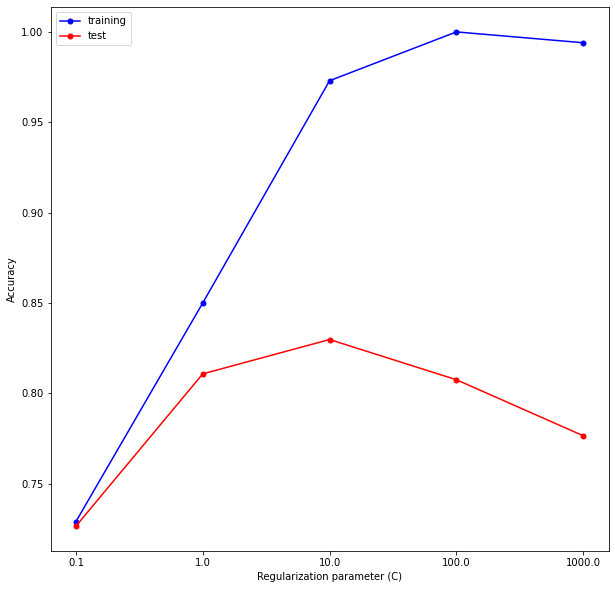

In [11]:
parameters = np.array(Cs).astype(str)
plt.figure(figsize = (10, 10))
#print(rmse_values_train)
plt.plot(parameters, accuracyTrains, marker = ".", markersize = 10, linestyle = "-", color = "b",label='train')
plt.plot(parameters, accuracyTests, marker = ".", markersize = 10, linestyle = "-", color = "r",label='test')
plt.xlabel("Regularization parameter (C)")
plt.ylabel("Accuracy")
plt.legend(['training', 'test'])
plt.show()